In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_polymer(polymer):
    """
    Plots the polymer chain given an array of (x, y) coordinates.
    """
    x, y = polymer[:, 0], polymer[:, 1]
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.title("Polymer Configuration")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

Trapped at step 71, returning polymer of length 71 with weight 4.182058890788734e+28.


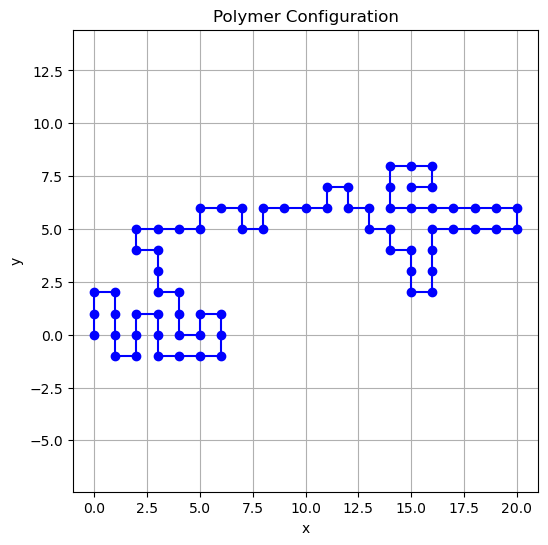

Rosenbluth weight: 4.182058890788734e+28


In [ ]:
import numpy as np

def generate_rosenbluth_saw(length):
    """
    Generates a 2D self-avoiding walk using the Rosenbluth method. Description of task and equations referenced from:
    https://compphys.quantumtinkerer.tudelft.nl/proj2-polymers/
    """
    steps = np.array([[1,0], [-1,0], [0,1], [0,-1]])
    polymer = np.zeros((length, 2), dtype=int)
    weight = 1.0

    for i in range(1, length):
        # Find all possible moves that do not revisit a site
        possible_moves = []
        for move in steps:
            next_pos = polymer[i-1] + move
            if not np.any(np.all(polymer[:i] == next_pos, axis=1)):
                possible_moves.append(move)
        num_choices = len(possible_moves)
        if num_choices == 0:
            # Trapped: return the walk so far and its weight
            print(f"Trapped at step {i}, returning polymer of length {i} with weight {weight}.")
            return polymer[:i], weight
        # Rosenbluth weight: multiply by number of choices at this step
        weight *= num_choices
        # Randomly choose one of the possible moves
        chosen_move = possible_moves[np.random.choice(num_choices)]
        polymer[i] = polymer[i-1] + chosen_move

    return polymer, weight

# Test function, 1000 is probably too long as the Rosenbluth method tends to get trapped early
length = 1000
polymer, weight = generate_rosenbluth_saw(length)
plot_polymer(polymer)
print(f"Rosenbluth weight: {weight}")

## Quick check for validity of polymer scaling laws
where ν=3/4 for 2D, and ν≈3/5 in 3D.
2v = 1.5 for 2D and 2v = 1.2 in 3D

In [ ]:
def calc_sq_end_end_dist(polymer):
    """
    Calculates the squared end-to-end distance of a polymer chain.
    """
    x_l, y_l = polymer[-1, 0], polymer[-1, 1]
    return (x_l - polymer[0, 0])**2 + (y_l - polymer[0, 1])**2

num_walks = 200
length = 10
sq_end_end_dist = np.zeros(num_walks)
weights = np.zeros(num_walks)

for i in range(num_walks):
    polymer, weight = generate_rosenbluth_saw(length)
    sq_end_end_dist[i] = calc_sq_end_end_dist(polymer)
    weights[i] = weight

# Weighted average according to Rosenbluth weights
mean_weighted_end_to_end_distance = np.sum(weights * sq_end_end_dist) / np.sum(weights)
print(f"Weighted mean squared end-to-end distance for {length} bonds after {num_walks} random walks: {mean_weighted_end_to_end_distance}")

num_walks = 200
length = 20
sq_end_end_dist = np.zeros(num_walks)
weights = np.zeros(num_walks)

for i in range(num_walks):
    polymer, weight = generate_rosenbluth_saw(length)
    sq_end_end_dist[i] = calc_sq_end_end_dist(polymer)
    weights[i] = weight

# Weighted average according to Rosenbluth weights
mean_weighted_end_to_end_distance = np.sum(weights * sq_end_end_dist) / np.sum(weights)
print(f"Weighted mean squared end-to-end distance for {length} bonds after {num_walks} random walks: {mean_weighted_end_to_end_distance}")

num_walks = 200
length = 40
sq_end_end_dist = np.zeros(num_walks)
weights = np.zeros(num_walks)

for i in range(num_walks):
    polymer, weight = generate_rosenbluth_saw(length)
    sq_end_end_dist[i] = calc_sq_end_end_dist(polymer)
    weights[i] = weight

mean_weighted_end_to_end_distance = np.sum(weights * sq_end_end_dist) / np.sum(weights)
print(f"Weighted mean squared end-to-end distance for {length} bonds after {num_walks} random walks: {mean_weighted_end_to_end_distance}")

Weighted mean squared end-to-end distance for 10 bonds after 200 random walks: 19.783550234252992
Weighted mean squared end-to-end distance for 20 bonds after 200 random walks: 73.82415293926304
Weighted mean squared end-to-end distance for 40 bonds after 200 random walks: 182.00454588769082


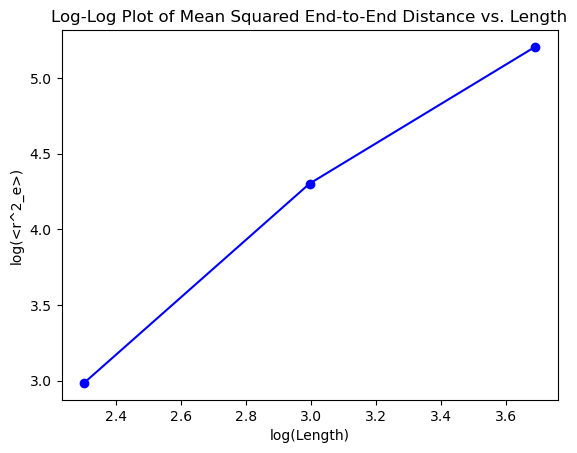

Slope (scaling exponent 2ν): 1.600


In [ ]:
# Take values manually from the output to plot slope of log-log plot for 2v
x = [10, 20, 40]
y = [19.8, 73.8, 182.0]

plt.plot(np.log(x), np.log(y), marker='o', linestyle='-', color='b')
slope, intercept = np.polyfit(np.log(x), np.log(y), 1)
plt.title("Log-Log Plot of Mean Squared End-to-End Distance vs. Length")
plt.xlabel("log(Length)")
plt.ylabel("log(<r^2_e>)")
plt.show()

print(f"Slope (scaling exponent 2ν): {slope:.3f}")